# WEB SCRAPING

Web pages are written in a markup language called `HTML` with another language called `CSS` that dictates how the `HTML` gets rendered in your browser, we also use `javascript` in web pages to give the pages and page components behavior; we hook some `javascript` code to a certain element in the `HTML`, button for example, so it does something when someone clicks on it.

![lab2_1.png](lab2_1.png)

In [85]:
# Imports
import requests

In [86]:
# let's begin exploring the library by trying to parse a simple page
response = requests.get("https://www.google.com")

In [87]:
response.text # this is string

'<!doctype html><html dir="rtl" itemscope="" itemtype="http://schema.org/WebPage" lang="ar-SA"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="p5Fb5mWlPd1WEbZPYMyaBA">(function(){window.google={kEI:\'8V9BY_qfHZbQ5OUPgYq6CA\',kEXPI:\'0,202534,1100002,56873,1709,4349,207,4804,2316,383,246,5,5367,1123753,1197792,380699,16114,28684,22431,996,365,283,12030,17586,4998,13228,3847,10622,22741,5966,708,1279,2742,149,1103,840,6297,3514,606,2023,1777,520,14670,3227,2845,7,29075,4142,553,4465,13138,3,350,230,6459,149,13975,4,1528,2304,7039,27731,7182,175,13658,4437,13627,3159,5815,2542,4094,4052,3,3541,1,42154,2,14022,6249,7867,11623,5679,1021,2378,28744,4567,6259,23418,1252,5835,14967,4333,18,7466,445,2,2,1,26632,8155,7321,60,15970,872,14837,4797,7,1922,9779,12414,9365,9543,1741,3091,1520,1004,3237,1611,8592,1045,6,123,700,4,1,2,2,2,2,424,4914,

In [88]:
response.content # this is bytes

b'<!doctype html><html dir="rtl" itemscope="" itemtype="http://schema.org/WebPage" lang="ar-SA"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="p5Fb5mWlPd1WEbZPYMyaBA">(function(){window.google={kEI:\'8V9BY_qfHZbQ5OUPgYq6CA\',kEXPI:\'0,202534,1100002,56873,1709,4349,207,4804,2316,383,246,5,5367,1123753,1197792,380699,16114,28684,22431,996,365,283,12030,17586,4998,13228,3847,10622,22741,5966,708,1279,2742,149,1103,840,6297,3514,606,2023,1777,520,14670,3227,2845,7,29075,4142,553,4465,13138,3,350,230,6459,149,13975,4,1528,2304,7039,27731,7182,175,13658,4437,13627,3159,5815,2542,4094,4052,3,3541,1,42154,2,14022,6249,7867,11623,5679,1021,2378,28744,4567,6259,23418,1252,5835,14967,4333,18,7466,445,2,2,1,26632,8155,7321,60,15970,872,14837,4797,7,1922,9779,12414,9365,9543,1741,3091,1520,1004,3237,1611,8592,1045,6,123,700,4,1,2,2,2,2,424,4914

Let's see how we can transform this text into some parsed thingy so we can start consume it. 

We will use [beautiful soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#beautiful-soup-documentation)

In [89]:
# install 

# !pip install beautifulsoup4

In [90]:
# import the constructor of the parsing thing from the library
from bs4 import BeautifulSoup

In [91]:
soup = BeautifulSoup(response.content) # but can also work with response.text string -- using bytes is faster tho

In [92]:
soup

<!DOCTYPE html>
<html dir="rtl" itemscope="" itemtype="http://schema.org/WebPage" lang="ar-SA"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>Google</title><script nonce="p5Fb5mWlPd1WEbZPYMyaBA">(function(){window.google={kEI:'8V9BY_qfHZbQ5OUPgYq6CA',kEXPI:'0,202534,1100002,56873,1709,4349,207,4804,2316,383,246,5,5367,1123753,1197792,380699,16114,28684,22431,996,365,283,12030,17586,4998,13228,3847,10622,22741,5966,708,1279,2742,149,1103,840,6297,3514,606,2023,1777,520,14670,3227,2845,7,29075,4142,553,4465,13138,3,350,230,6459,149,13975,4,1528,2304,7039,27731,7182,175,13658,4437,13627,3159,5815,2542,4094,4052,3,3541,1,42154,2,14022,6249,7867,11623,5679,1021,2378,28744,4567,6259,23418,1252,5835,14967,4333,18,7466,445,2,2,1,26632,8155,7321,60,15970,872,14837,4797,7,1922,9779,12414,9365,9543,1741,3091,1520,1004,3237,1611,8592,1045,6,123,700,4,1,2,2,2,2,424,4914,8

it looks now a bit "structure" if you see the difference between the output here and the output of the above cell.

---
Let's see how to query the parsed webpage, aka the soup.

In [93]:
# try to get the first <div> tag
soup.find("div")

<div id="mngb"><div id="gbar"><nobr><b class="gb1">بحث</b> <a class="gb1" href="https://www.google.com.sa/imghp?hl=ar&amp;tab=wi">صور</a> <a class="gb1" href="https://maps.google.com.sa/maps?hl=ar&amp;tab=wl">خرائط Google</a> <a class="gb1" href="https://play.google.com/?hl=ar&amp;tab=w8">Play</a> <a class="gb1" href="https://www.youtube.com/?tab=w1">YouTube</a> <a class="gb1" href="https://news.google.com/?tab=wn">الأخبار</a> <a class="gb1" href="https://mail.google.com/mail/?tab=wm">Gmail</a> <a class="gb1" href="https://drive.google.com/?tab=wo">Drive</a> <a class="gb1" href="https://www.google.com.sa/intl/ar/about/products?tab=wh" style="text-decoration:none"><u>المزيد</u> »</a></nobr></div><div id="guser" width="100%"><nobr><span class="gbi" id="gbn"></span><span class="gbf" id="gbf"></span><span id="gbe"></span><a class="gb4" href="http://www.google.com.sa/history/optout?hl=ar">سِجل بحث الويب</a> | <a class="gb4" href="/preferences?hl=ar">الإعدادات</a> | <a class="gb4" href="http

In [94]:
# what is the type of that?
type(soup.find("div"))

bs4.element.Tag

The `div` we got in the first cell has attribute `id` that has a value `mngb`. We can use that to get the same tag.

In [96]:
# this line gets the first tag that has the attribute id equals mngb
soup.find(id="guser")

<div id="guser" width="100%"><nobr><span class="gbi" id="gbn"></span><span class="gbf" id="gbf"></span><span id="gbe"></span><a class="gb4" href="http://www.google.com.sa/history/optout?hl=ar">سِجل بحث الويب</a> | <a class="gb4" href="/preferences?hl=ar">الإعدادات</a> | <a class="gb4" href="https://accounts.google.com/ServiceLogin?hl=ar&amp;passive=true&amp;continue=https://www.google.com/&amp;ec=GAZAAQ" id="gb_70" target="_top">تسجيل الدخول</a></nobr></div>



Okay we have the tag now, lets get the actual text data inside that tag. 

In [97]:
# here I'm telling soup to get me the first tag that is <div> and that <div> must have attribute id equals to "mngb"
soup.find("div", id="mngb").text

'بحث صور خرائط Google Play YouTube الأخبار Gmail Drive المزيد »سِجل بحث الويب | الإعدادات | تسجيل الدخول'

---

Okay google example is a bit complicated with us let's have small document.

The below examples have been selected/copied from beautiful soup documentation [here](https://www.crummy.com/software/BeautifulSoup/bs4/doc) so we can discuss them in the session.

In [99]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

In [100]:
soup = BeautifulSoup(html_doc)

The simplest way to navigate the parse tree is to say the name of the tag you want. If you want the <head> tag, just say `soup.head`

In [102]:
# soup.head
# <head><title>The Dormouse's story</title></head>

soup.title
# <title>The Dormouse's story</title>

<title>The Dormouse's story</title>

If you need to get all the `<a>` tags, or anything more complicated than the first tag with a certain name, you’ll need to use one of the methods described in Searching the tree section (in the website), such as `find_all()`:

In [103]:
soup.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

A tag’s children are available in a list called `.contents`:

In [113]:
head_tag = soup.head
head_tag
# <head><title>The Dormouse's story</title></head>

# head_tag.contents
# [<title>The Dormouse's story</title>]

# title_tag= head_tag.contents[0]
# <title>The Dormouse's story</title>

# title_tag.contents[0]
# head_tag.contents[0].contents
# ['The Dormouse's story']


head_tag.next_element
# <title>The Dormouse's story</title>


head_tag.next_element.next_element
# "The Dormouse's story"


type(head_tag.next_element.next_element)


bs4.element.NavigableString

# Searching with string

In [114]:
soup.find_all('b')

[<b>The Dormouse's story</b>]

# Searching with regular expression

In [115]:
xx =soup.find_all(re.compile("^b"))
xx

[<body>
 <p class="title"><b>The Dormouse's story</b></p>
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>
 <p class="story">...</p>
 </body>,
 <b>The Dormouse's story</b>]

In [18]:
import re
for tag in soup.find_all(re.compile("^b")): # start with string with b .. meaning get the tag that starts with b
    print(tag)
    print("\n-------\n")

<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body>

-------

<b>The Dormouse's story</b>

-------



# Searching with a list

In [116]:
soup.find_all(["a", "b"]) # get tags that start with a or b

[<b>The Dormouse's story</b>,
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

# Searching with True value

In [119]:
for tag in soup.find_all(class_=True):   # see how the attribute class is written class_?
    print(tag.name)

p
p
a
a
a
p


# Searching with a function

In [22]:
def has_class_but_no_id(tag):
    return tag.has_attr('class') and not tag.has_attr('id')

In [23]:
soup.find_all(has_class_but_no_id)

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [120]:
import re
def not_lacie(href):
    return href and not re.compile("lacie").search(href) # not has word lacie in the href

soup.find_all(href=not_lacie)

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [121]:
from bs4 import NavigableString
def surrounded_by_strings(tag):
    return (isinstance(tag.next_element, NavigableString) # go see what navigable string is in the documentation
            and isinstance(tag.previous_element, NavigableString))

for tag in soup.find_all(surrounded_by_strings):
    print(tag.name)

body
p
a
a
a
p


# Searching with CSS selectors

Never heard about `CSS` selectors? Check this tutorial [here](https://developer.mozilla.org/en-US/docs/Learn/CSS/Building_blocks/Selectors) from mdn. You may use them, so make sure that you understand them. CSS selectors could be a VERY powerful tool in your repertoire, so try to really understand it.

In [122]:
# select tag <title>
soup.select("title")


[<title>The Dormouse's story</title>]

In [123]:
# select <a> tags that are beneath <body> tag
soup.select("body a")


[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [124]:
# select <title> tage that is directly beneath head tag
soup.select("head > title")

[<title>The Dormouse's story</title>]

# Real Example

Let's scrape a single Wikipedia page and get data from it. Let's say for example Greece page.

In [125]:
# get the page content and parse it
page = requests.get("https://en.wikipedia.org/wiki/Greece")
soup = BeautifulSoup(page.content)

If you go to https://en.wikipedia.org/wiki/Greece you will see that the data we want to scrape happens to be confined inside a table on the right. If you opened the dev tools in your browser you will find that this table is inside a `<table>` tag and table rows `<tr>` are inside the `<tbody>` tag inside the `<table>` tag. We are interested in these table rows

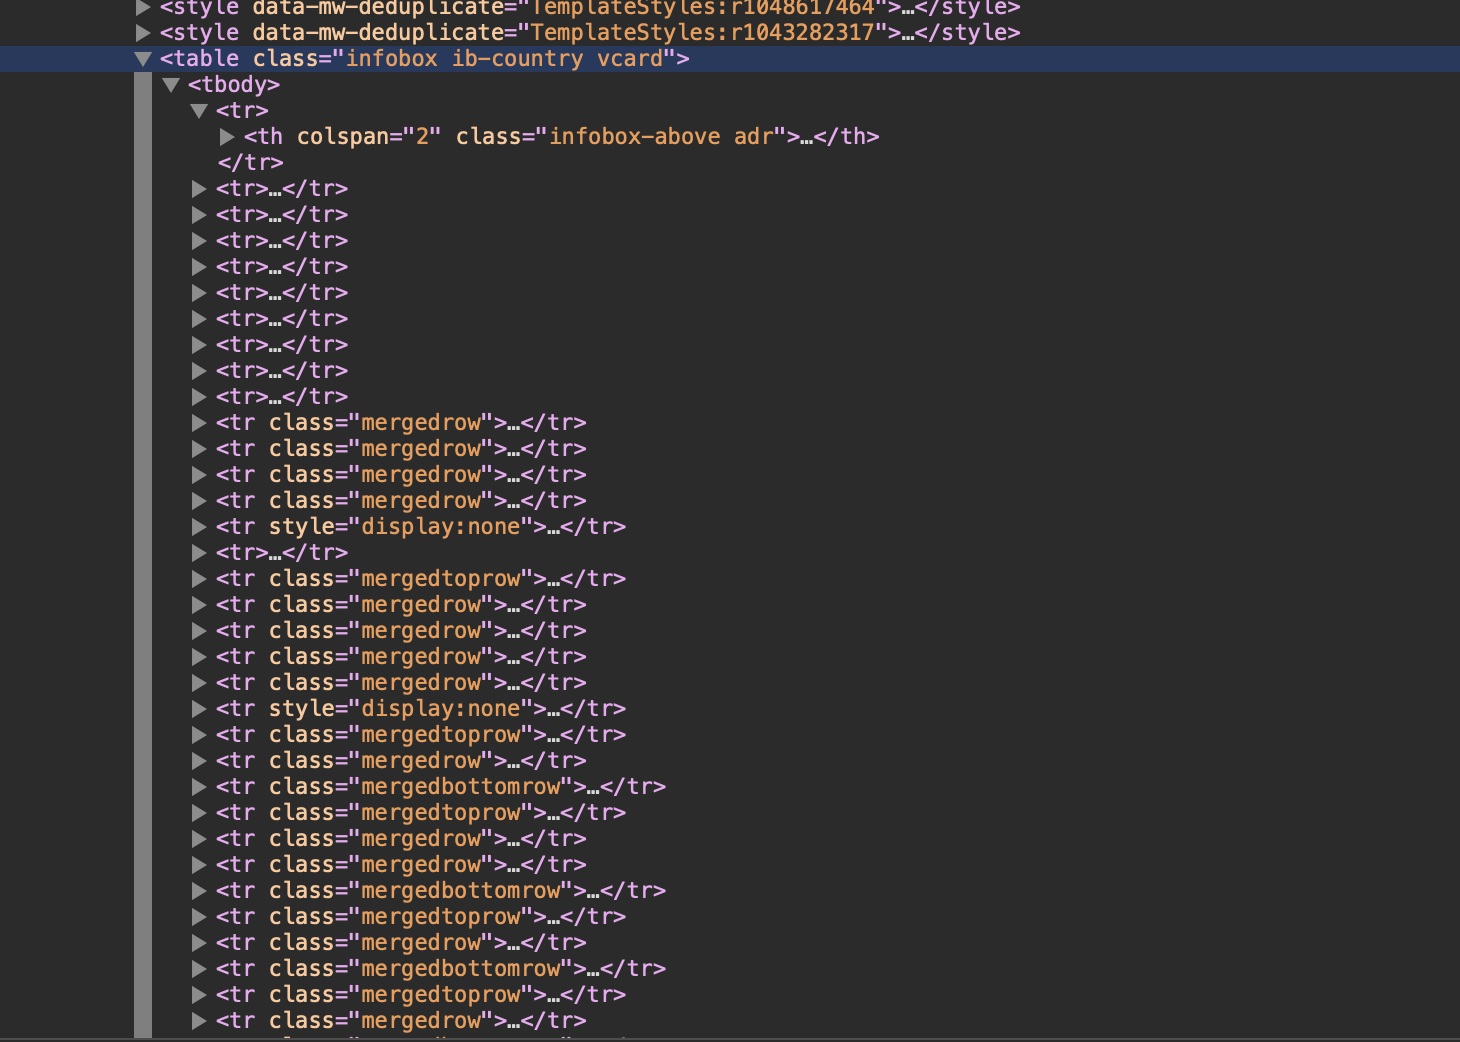

In [126]:
table= soup.find(class_ = "infobox")

table

<table class="infobox ib-country vcard"><tbody><tr><th class="infobox-above adr" colspan="2"><div class="fn org country-name">Hellenic Republic</div><div class="ib-country-names"><span title="Greek-language text"><span lang="el" style="font-style: normal;">Ελληνική Δημοκρατία</span></span> <span class="languageicon" style="font-size:100%; font-weight:normal">(<a href="/wiki/Greek_language" title="Greek language">Greek</a>)</span><br/><span style="font-size:85%;"><span title="Greek-language romanization"><i lang="el-Latn">Ellinikí Dimokratía</i></span></span></div></th></tr><tr><td class="infobox-image" colspan="2"><div class="noresize" style="display:table; width:100%;">
<div style="display:table-cell; vertical-align:middle; padding-left:5px;">
<div style="padding-bottom:3px;"><a class="image" href="/wiki/File:Flag_of_Greece.svg" title="Flag of Greece"><img alt="Flag of Greece" class="thumbborder" data-file-height="400" data-file-width="600" decoding="async" height="83" src="//upload.w

In [127]:
tbody= table.tbody

tbody

<tbody><tr><th class="infobox-above adr" colspan="2"><div class="fn org country-name">Hellenic Republic</div><div class="ib-country-names"><span title="Greek-language text"><span lang="el" style="font-style: normal;">Ελληνική Δημοκρατία</span></span> <span class="languageicon" style="font-size:100%; font-weight:normal">(<a href="/wiki/Greek_language" title="Greek language">Greek</a>)</span><br/><span style="font-size:85%;"><span title="Greek-language romanization"><i lang="el-Latn">Ellinikí Dimokratía</i></span></span></div></th></tr><tr><td class="infobox-image" colspan="2"><div class="noresize" style="display:table; width:100%;">
<div style="display:table-cell; vertical-align:middle; padding-left:5px;">
<div style="padding-bottom:3px;"><a class="image" href="/wiki/File:Flag_of_Greece.svg" title="Flag of Greece"><img alt="Flag of Greece" class="thumbborder" data-file-height="400" data-file-width="600" decoding="async" height="83" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5

In [52]:
tbody.children

In [128]:
# getting the table rows
# soup library returns list iterator so we need to explicitly convert it to list so we can index it and all that is stuff
table_rows = list(tbody.children) 

for row in table_rows:
    print(table_rows)
    print("-----------")

[<tr><th class="infobox-above adr" colspan="2"><div class="fn org country-name">Hellenic Republic</div><div class="ib-country-names"><span title="Greek-language text"><span lang="el" style="font-style: normal;">Ελληνική Δημοκρατία</span></span> <span class="languageicon" style="font-size:100%; font-weight:normal">(<a href="/wiki/Greek_language" title="Greek language">Greek</a>)</span><br/><span style="font-size:85%;"><span title="Greek-language romanization"><i lang="el-Latn">Ellinikí Dimokratía</i></span></span></div></th></tr>, <tr><td class="infobox-image" colspan="2"><div class="noresize" style="display:table; width:100%;">
<div style="display:table-cell; vertical-align:middle; padding-left:5px;">
<div style="padding-bottom:3px;"><a class="image" href="/wiki/File:Flag_of_Greece.svg" title="Flag of Greece"><img alt="Flag of Greece" class="thumbborder" data-file-height="400" data-file-width="600" decoding="async" height="83" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Fl

[<tr><th class="infobox-above adr" colspan="2"><div class="fn org country-name">Hellenic Republic</div><div class="ib-country-names"><span title="Greek-language text"><span lang="el" style="font-style: normal;">Ελληνική Δημοκρατία</span></span> <span class="languageicon" style="font-size:100%; font-weight:normal">(<a href="/wiki/Greek_language" title="Greek language">Greek</a>)</span><br/><span style="font-size:85%;"><span title="Greek-language romanization"><i lang="el-Latn">Ellinikí Dimokratía</i></span></span></div></th></tr>, <tr><td class="infobox-image" colspan="2"><div class="noresize" style="display:table; width:100%;">
<div style="display:table-cell; vertical-align:middle; padding-left:5px;">
<div style="padding-bottom:3px;"><a class="image" href="/wiki/File:Flag_of_Greece.svg" title="Flag of Greece"><img alt="Flag of Greece" class="thumbborder" data-file-height="400" data-file-width="600" decoding="async" height="83" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Fl

[<tr><th class="infobox-above adr" colspan="2"><div class="fn org country-name">Hellenic Republic</div><div class="ib-country-names"><span title="Greek-language text"><span lang="el" style="font-style: normal;">Ελληνική Δημοκρατία</span></span> <span class="languageicon" style="font-size:100%; font-weight:normal">(<a href="/wiki/Greek_language" title="Greek language">Greek</a>)</span><br/><span style="font-size:85%;"><span title="Greek-language romanization"><i lang="el-Latn">Ellinikí Dimokratía</i></span></span></div></th></tr>, <tr><td class="infobox-image" colspan="2"><div class="noresize" style="display:table; width:100%;">
<div style="display:table-cell; vertical-align:middle; padding-left:5px;">
<div style="padding-bottom:3px;"><a class="image" href="/wiki/File:Flag_of_Greece.svg" title="Flag of Greece"><img alt="Flag of Greece" class="thumbborder" data-file-height="400" data-file-width="600" decoding="async" height="83" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Fl

[<tr><th class="infobox-above adr" colspan="2"><div class="fn org country-name">Hellenic Republic</div><div class="ib-country-names"><span title="Greek-language text"><span lang="el" style="font-style: normal;">Ελληνική Δημοκρατία</span></span> <span class="languageicon" style="font-size:100%; font-weight:normal">(<a href="/wiki/Greek_language" title="Greek language">Greek</a>)</span><br/><span style="font-size:85%;"><span title="Greek-language romanization"><i lang="el-Latn">Ellinikí Dimokratía</i></span></span></div></th></tr>, <tr><td class="infobox-image" colspan="2"><div class="noresize" style="display:table; width:100%;">
<div style="display:table-cell; vertical-align:middle; padding-left:5px;">
<div style="padding-bottom:3px;"><a class="image" href="/wiki/File:Flag_of_Greece.svg" title="Flag of Greece"><img alt="Flag of Greece" class="thumbborder" data-file-height="400" data-file-width="600" decoding="async" height="83" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Fl

[<tr><th class="infobox-above adr" colspan="2"><div class="fn org country-name">Hellenic Republic</div><div class="ib-country-names"><span title="Greek-language text"><span lang="el" style="font-style: normal;">Ελληνική Δημοκρατία</span></span> <span class="languageicon" style="font-size:100%; font-weight:normal">(<a href="/wiki/Greek_language" title="Greek language">Greek</a>)</span><br/><span style="font-size:85%;"><span title="Greek-language romanization"><i lang="el-Latn">Ellinikí Dimokratía</i></span></span></div></th></tr>, <tr><td class="infobox-image" colspan="2"><div class="noresize" style="display:table; width:100%;">
<div style="display:table-cell; vertical-align:middle; padding-left:5px;">
<div style="padding-bottom:3px;"><a class="image" href="/wiki/File:Flag_of_Greece.svg" title="Flag of Greece"><img alt="Flag of Greece" class="thumbborder" data-file-height="400" data-file-width="600" decoding="async" height="83" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Fl

I guess all that is left is to iterate through the table rows list and parse them and get what we want -- let's try to get the name of the country and the name of the capital city and its coordinates.

Let's first see where the tags for the name and coordinates and city in the markup

## The name of the country

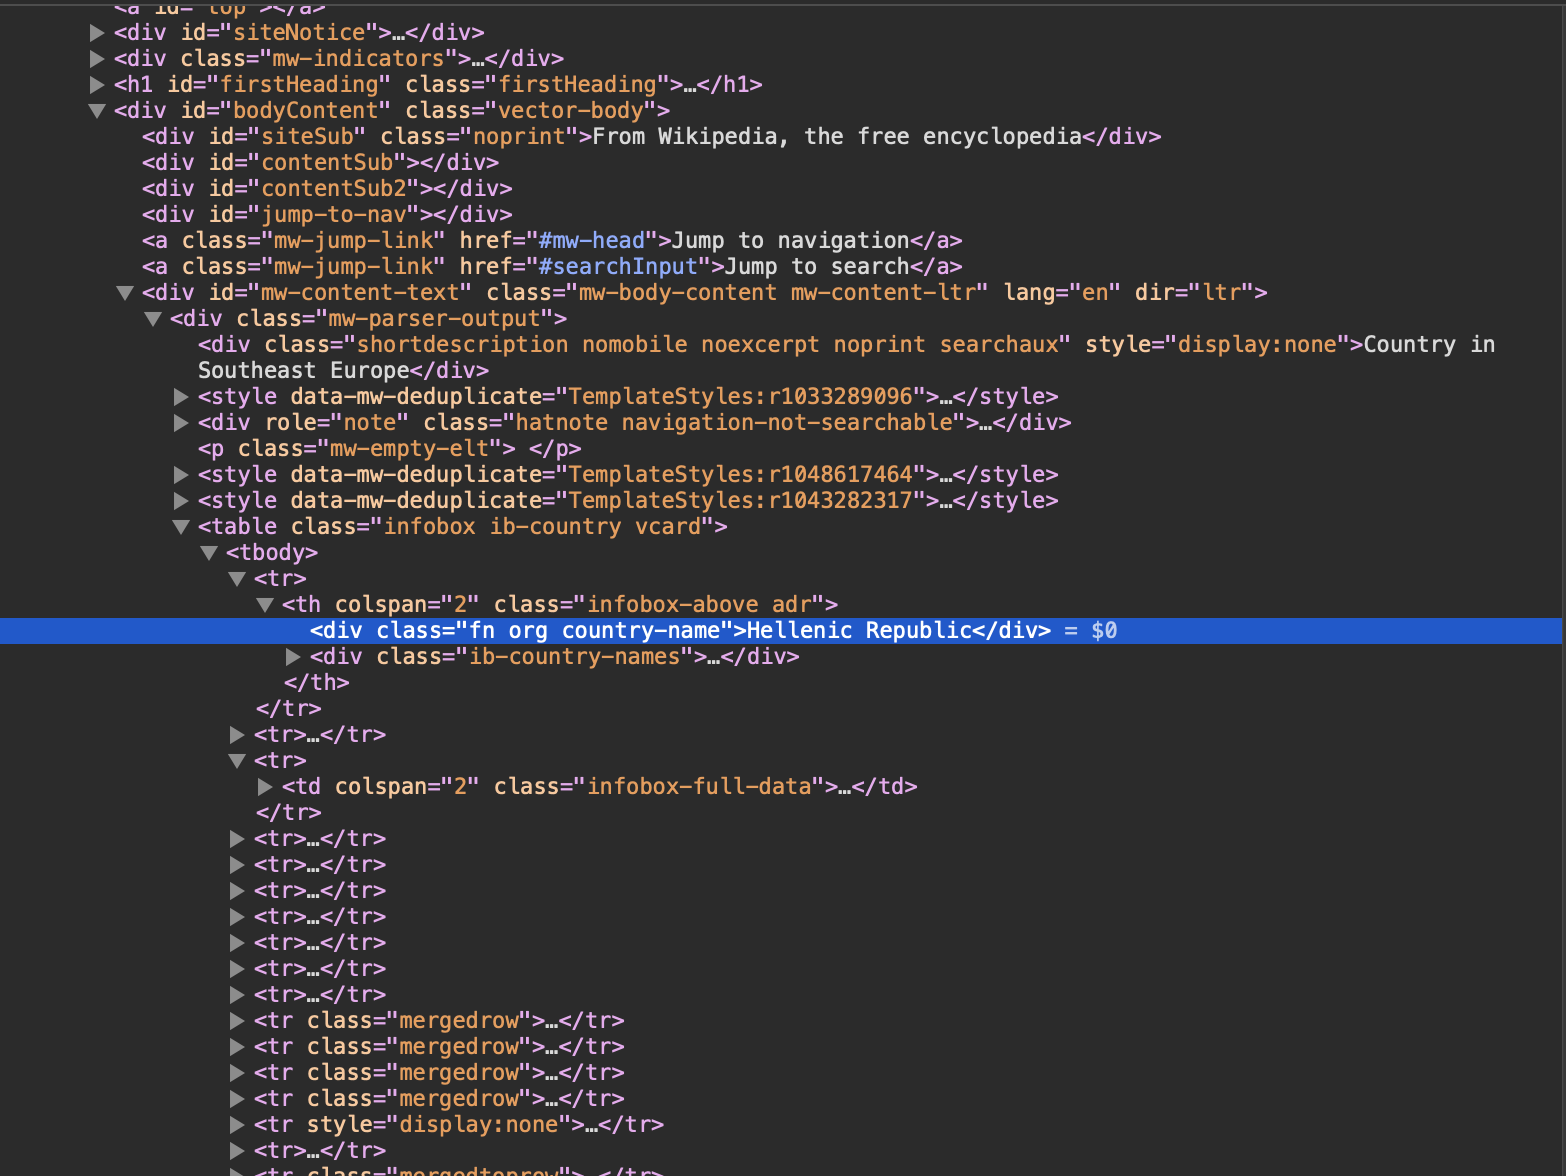

## The capital city and its coordinates

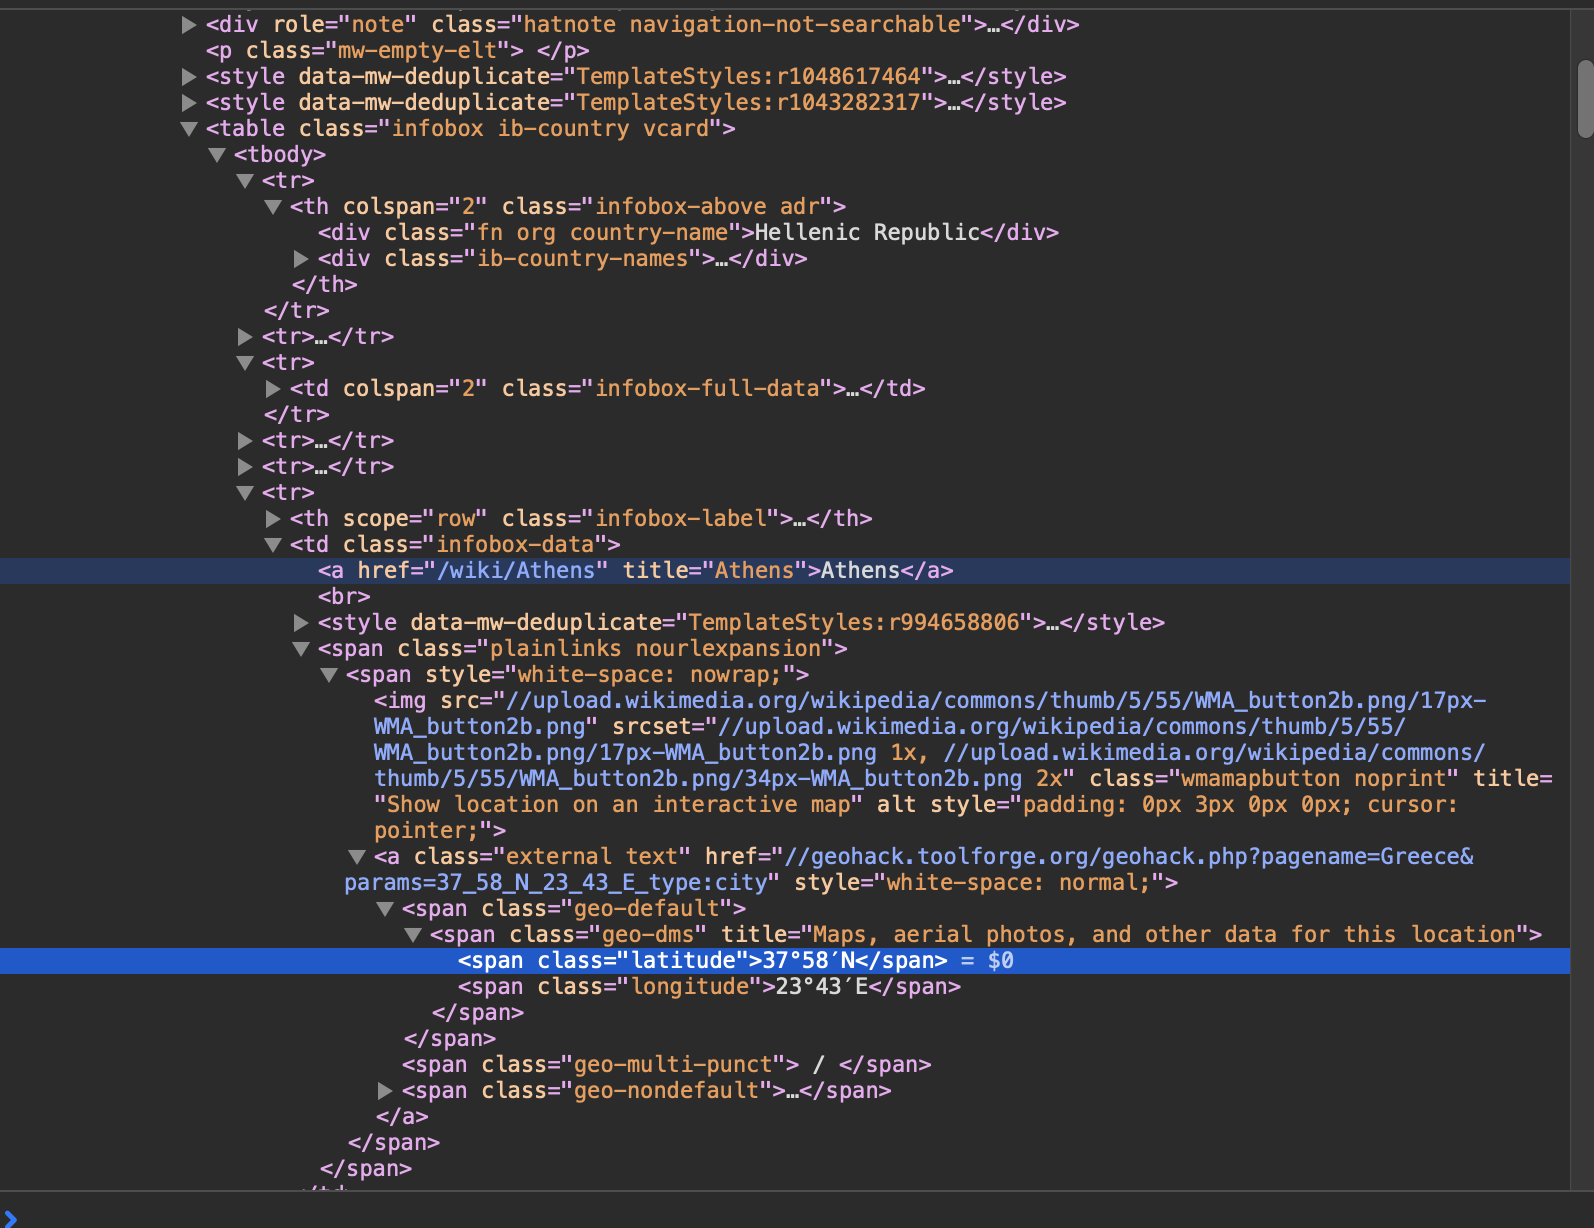

Seems like the only logical thing to do here is to iterate through each `<tr>` tag inside the table and try to parse it as if it is independent document.

In [57]:
# ignore this method for now ... and read the next cell

# Only used it to make you remember that you may want to use regular expressions to match something 
# otherwise this is totally not needed
import re
def make_sure_with_regex_that_this_is_ib_country_largest(class_attribute_value):
    return class_attribute_value and re.compile("ib-.*-largest").search(class_attribute_value)

In [58]:
table_rows_num = len(table_rows) # to define the range of our loop
# we will store the scraped data here
country_name = None     
capital_name = None
latitude = None
longitude = None

# of course you can consume the iterator like `for row in table_rows:`
# but I found it helpful to manipulate the current index of iteration in some situations

for i in range(table_rows_num): 
    table_row = table_rows[i]
    for table_data in table_row.children:
        
        # getting name
        country_name_tag = table_data.find(class_="country-name")
        
        # this condition will only be true if the current table_row
        # contains "country_name" class value ... this will make it
        # safe to run the "parsing" logic for every row without
        # the fear of overwriting the data you scraped
        if country_name_tag:
            country_name = country_name_tag.text
        
        # getting the capital name and coordinates
        capital_tag = table_data.find(class_=make_sure_with_regex_that_this_is_ib_country_largest)
        # See the if condition again so we don't overwrite the data
        # we scraped
        if capital_tag:
            second_child = list(table_row.children)[1]
            capital_name_tag = second_child.find(title=True)
            if capital_name_tag:
                capital_name = capital_name_tag.text

            latitude = second_child.find(class_="latitude").text
            longitude = second_child.find(class_="longitude").text        

In [129]:
print(country_name, capital_name, latitude, longitude, sep = ' - ')

Hellenic Republic - Athens - 37°58′N - 23°43′E


Load the scraped data into pandas dataframe so we can easily transform it to csv. You may want to install pandas first with `pip install pandas`

In [60]:
# %%capture
# !pip install pandas

In [130]:
# we only have one row of data 
import pandas as pd

to_be_transformed_into_pandas_dataframe = [{"id": 1, "name": country_name, "capital": capital_name, "latitude": latitude, "longitude": longitude}]

# transform into dataframe
df = pd.DataFrame(to_be_transformed_into_pandas_dataframe)

In [131]:
df

,id,name,capital,latitude,longitude
0,1,Hellenic Republic,Athens,37°58′N,23°43′E


Load this dataframe into csv that would finally go into your database

In [132]:
df.to_csv("country_data.csv", sep=',', encoding='utf-8', index=False)

Let's try and read the new file

In [65]:
!type country_data.csv

id,name,capital,latitude,longitude
1,Hellenic Republic,Athens,37Â°58â€²N,23Â°43â€²E


Now you need to load this .csv file into mysql table in your database. Very googleable thing but don't panic if you got permission errors from mysql server that the server can't trust your local files and things like that, this is another mystery for you to solve :").

# Generate fake data

We will be using [faker](https://faker.readthedocs.io/en/master/). This can be used to generate fake name and texts and stuff you may find very important when populating your database with dummy data.

In [67]:
# %%capture
# !pip install faker

In [133]:
from faker import Faker

In [134]:
faker = Faker()

In [138]:
faker.text()

'East moment agreement specific lay. Window significant none article serve. Type feeling evening.'

In [141]:
faker.name()

'Sean Fritz'

In [142]:
faker.email()

'sabrinaclark@example.net'

In [143]:
faker.address()

'39265 Smith Ranch\nKaylafurt, HI 78865'

In [144]:
faker.credit_card_number()

'2715957430488349'

In [145]:
faker.paragraph()

'Gun girl education key he first each. Way can result serve commercial develop stuff.'

In [76]:
faker.paragraphs()

['Rise lot provide author discussion. Oil half lot firm pressure.',
 'Today senior scene face meet glass. Describe join yet foot civil. Some reality else feeling. Already generation education interesting stuff attack soldier.',
 'Rule avoid bring. Radio meeting condition allow. Day nation property edge but.']

# END :) XD